### Project - Twitter US Airline Sentiment
####  Guillermo Medina

Background and Context:

Twitter posses 330 million monthly active users, which allows businesses to reach a broad population and connect with customers without intermediaries. On the other side, there’s so much information that it’s difficult for brands to quickly detect negative social mentions that could harm their business.

That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.


Listening to how customers feel about the product/services on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand, and their competitors, and discover new trends in the industry.


Data Description:

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

 

#### Dataset:

The dataset has the following columns:

- tweet_id                                                           
- airline_sentiment                                               
- airline_sentiment_confidence                               
- negativereason                                                   
- negativereason_confidence                                    
- airline                                                                    
- airline_sentiment_gold                                              
- name     
- negativereason_gold 
- retweet_count
- text
- tweet_coord
- tweet_created
- tweet_location 
- user_timezone

#### Objective:

To implement the techniques learned as a part of the course.

### Learning Outcomes:

- Basic understanding of text pre-processing.
- What to do after text pre-processing
- Bag of words
- Tf-idf
- Build the classification model.
- Evaluate the Model

Steps and tasks:

1. Import the libraries, load dataset, the print shape of data, data description. 
2. Understand of data columns: 
     a. Drop all other columns except “text” and “airline_sentiment”.
     b. Check the shape of the data.
     c. Print the first 5 rows of data.
3. Text pre-processing: Data preparation. 
NOTE:- Each text pre-processing step should be mentioned in the notebook separately.
     a. Html tag removal.
     b. Tokenization.
     c. Remove the numbers.
     d. Removal of Special Characters and Punctuations.
     e. Removal of stopwords
     f. Conversion to lowercase.
     g. Lemmatize or stemming.
     h. Join the words in the list to convert back to text string in the data frame. (So that each row
          contains the data in text format.)
     i. Print the first 5 rows of data after pre-processing.
4. Vectorization: 
    a. Use CountVectorizer.
    b. Use TfidfVectorizer.
5. Fit and evaluate the model using both types of vectorization. 
6. Summarize your understanding of the application of Various Pre-processing and Vectorization and the performance of your model on this dataset. 
7.Overall notebook should have:
     a. Well commented code
     b. Structure and flow

#### Import Libraries

In [1]:
import re, string, unicodedata                      #Regular Expressions, string and unicodedata
import numpy as np                                  #Large and multi-dimensional arrays
import pandas as pd                                 #Data manipulation and analysis
import matplotlib.pyplot as plt                     # Import plt for visualization
import nltk                                         #Natural language processing tool-kit

nltk.download('stopwords')                          #Download Stopwords                         
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                   #Stopwords corpus
from nltk.stem import PorterStemmer                 #Stemmer
from nltk.stem.wordnet import WordNetLemmatizer     #Lemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize               #Tokenize text


from sklearn.feature_extraction.text import CountVectorizer          #Bag of words
from sklearn.feature_extraction.text import TfidfVectorizer          #Term Frequency-Inverse Document Frequency (TF-IDF)


#Contractions are words or combinations of words that are shortened
!pip install contractions  
# Beautiful Soup is used for text cleaning with its inbuilt parser
!pip install beautifulsoup4

import contractions
from bs4 import BeautifulSoup  

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\guill\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\guill\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\guill\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#### Load twitter dataset
- The dataset contains information on the reviews provided by customers and the sentiment prediction from that review.

In [2]:
twit = pd.read_csv("Tweets.csv")

In [3]:
# Shape of Twitter data
twit.shape

(14640, 15)

- There are 14640 records and 15 columns

In [4]:
# Info
twit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [5]:
# Describe dataset
twit.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [6]:
# First 5 rows
twit.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [7]:
# Using only 10000 entries for demonstration purpose. As full data will take more time and memory to process.
# Only keeping relevant columns (text, airline_sentiment) from the dataset, as these columns are useful for our analysis.

twit = twit.loc[:9999, ['text','airline_sentiment']]

In [8]:
twit.isnull().sum(axis=0)                                # Check for NULL values.

text                 0
airline_sentiment    0
dtype: int64

- No null values

In [9]:
# Shape of twitter dataset
twit.shape

(10000, 2)

- There are now 14640 records and only 2 columns

In [10]:
# First 5 rows
twit.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


#### Data pre-processing
     a. Html tag removal.
     b. Tokenization.
     c. Remove the numbers.
     d. Removal of Special Characters and Punctuations.
     e. Removal of stopwords
     f. Conversion to lowercase.
     g. Lemmatize or stemming.
     h. Join the words in the list to convert back to text string in the data frame. (So that each row
          contains the data in text format.)
     i. Print the first 5 rows of data after pre-processing.

### HTML Tag Removal

- For removing HTML Tags we used Beautiful Soup with its built in html.parser for text cleaning

In [11]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")                    
    return soup.get_text()

twit['text'] = twit['text'].apply(lambda x: strip_html(x))
twit['airline_sentiment'] = twit['airline_sentiment'].apply(lambda x: strip_html(x))

twit.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


### Replace Contractions
- By replacing contractions the shortened versions of words are replaced by the full version of those words. This will be usefull later when we remove stop words.

In [12]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

twit['text'] = twit['text'].apply(lambda x: replace_contractions(x))
twit['airline_sentiment'] = twit['airline_sentiment'].apply(lambda x: replace_contractions(x))

twit.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you have added commercials...,positive
2,@VirginAmerica I did not today... Must mean I ...,neutral
3,@VirginAmerica it is really aggressive to blas...,negative
4,@VirginAmerica and it is a really big bad thin...,negative


### Remove Numbers
- Numbers do not provide any meaningful information in regards to what we want to predict and understand, which is the sentiment of the reviewers towards the airline.

In [13]:
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

twit['text'] = twit['text'].apply(lambda x: remove_numbers(x))
twit['airline_sentiment'] = twit['airline_sentiment'].apply(lambda x: remove_numbers(x))

twit.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you have added commercials...,positive
2,@VirginAmerica I did not today... Must mean I ...,neutral
3,@VirginAmerica it is really aggressive to blas...,negative
4,@VirginAmerica and it is a really big bad thin...,negative


### Tokenization

- With tokenization we brake the set of text into individual tokens (words).

In [14]:
twit['text'] = twit.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data

### Remove Stopwords

- By removing stop words we get rid of common words that carry less important meaning than key words for analyzing the data set.

In [15]:
stopwords = stopwords.words('english')
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

- Custom list is filled with all the stopwords. Custom list is substracted from Stopwords, and that is how we removed all stopwords.

In [16]:
customlist = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", 
              "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 
              'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 
              'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 
              'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 
              'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 
              'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 
              'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 
              'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 
              'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 
              'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 
              'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 
              'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 
              'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 
              'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', 
              "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 
              'wouldn', "wouldn't"]

stopwords = list(set(stopwords) - set(customlist))                              

#### Functions for:
- Removing non ascii characters
- Convert upper case letters into lower case
- Remove puntuations
- Remove stop words
- Lematize
- Normalize

In [17]:
lemmatizer = WordNetLemmatizer()

#Function to remove non ascii characters from the dataset
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

#Function to convert upper case letters into lower case letters from the dataset
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

#function to remove punctiations from the tweets in the text column
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

# funtion to remove stopwords
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

# Lemmatize was selected over Stemming. 
def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

# Function for normalizing
def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    
    #Join the words after tokenization and  removing unwanted characters
    return ' '.join(words)

In [18]:
#Normalize the text column containing the tweets in the data set
twit['text'] = twit.apply(lambda row: normalize(row['text']), axis=1)
twit.head()

,text,airline_sentiment
0,virginamerica what dhepburn say,neutral
1,virginamerica plus you have add commercials to...,positive
2,virginamerica i do not today must mean i need ...,neutral
3,virginamerica it be really aggressive to blast...,negative
4,virginamerica and it be a really big bad thing...,negative


### Vectorizer

- Converting the airline sentiment data from string to integer so that it can be processed for vectorization
- Negative sentiments is now represented by -1, neutral sentiments are 0, and positive sentiments are represented by 1.

In [19]:
airline_sentiment= {'negative':-1, 'neutral':0,'positive':1}  
twit['airline_sentiment'] = twit['airline_sentiment'].map(airline_sentiment).astype('Int32')

In [20]:
twit.head()

,text,airline_sentiment
0,virginamerica what dhepburn say,0
1,virginamerica plus you have add commercials to...,1
2,virginamerica i do not today must mean i need ...,0
3,virginamerica it be really aggressive to blast...,-1
4,virginamerica and it be a really big bad thing...,-1


### Count Vectorizer
- With Count vectorizer we convert text to numerical data and make it easy for text data to be used for classification.

In [21]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

bow_vec = CountVectorizer(max_features=2000)                # Keep only 2000 features as number of features will increase the processing time.
data_features = bow_vec.fit_transform(twit['text'])

data_features = data_features.toarray()                        # Convert the data features to array.

In [22]:
data_features.shape

(10000, 2000)

In [23]:
labels = twit['airline_sentiment']
labels = labels.astype('int')

- Split the data into training and testing set

In [24]:
# Splitting the data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)

In [25]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=10)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.7043999999999999


- With Count Vectorizer and Random Forest our cross validation score is 70%.

In [26]:
# Finding optimal number of base learners using k-fold Cross validation.
base_ln = [x for x in range(1, 25)]
base_ln

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

In [27]:
# K-Fold Cross-validation.
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

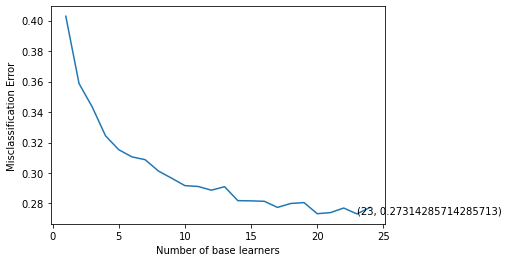

In [28]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                           #Error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]          #Selection of optimal nu of n_estimator corresponds to minimum error
plt.plot(base_ln, error)                                     #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [29]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.758

- After applying K-fold cross validation, the accuracy on the test data is 73.4%

In [30]:
result =  clf.predict(X_test)                  #saving the prediction on test data as a result

[[1678   58   32]
 [ 340  322   52]
 [ 171   73  274]]
0.7579999999999999


<AxesSubplot:>

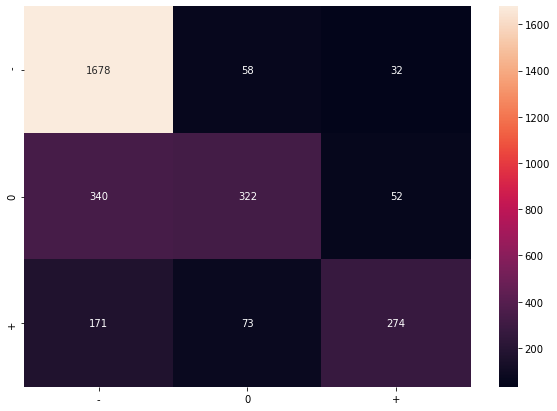

In [31]:
# Print and plot Confusion matrix to get an idea of how the distribution of the prediction is, among all the classes.
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

print(metrics.f1_score(y_test, result,average='micro'))

# Presenting metrics on the airline review sentiments with a format of - for negative, 0 for neutral and + for positive
df_cm = pd.DataFrame(conf_mat, index = [i for i in "-0+"],
                  columns = [i for i in "-0+"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

### Term Frequency - Inverse Document Frequency (TF-IDF)
- With TF-IDF each word occurance count is divided by the inverse document matrix

In [36]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000)              # Keep only 1000 features as number of features will increase the processing time.
data_features = vectorizer.fit_transform(twit['text'])

data_features = data_features.toarray()

data_features.shape

(10000, 1000)

In [37]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)

In [38]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import numpy as np

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=5)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.7003999999999999


- With TF-IDF and Random Forest our cross validation score is 70%

In [39]:
# K-Fold Cross Validation.
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

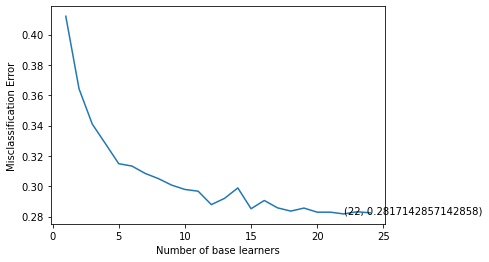

In [40]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                              #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                             #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                                        #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [41]:
# Training the best model and calculating error on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7406666666666667

- After applying K-fold cross validation, the accuracy on the test data is 74%

In [42]:
result = clf.predict(X_test)

[[1662   76   30]
 [ 360  310   44]
 [ 198   70  250]]
0.7406666666666667


<AxesSubplot:>

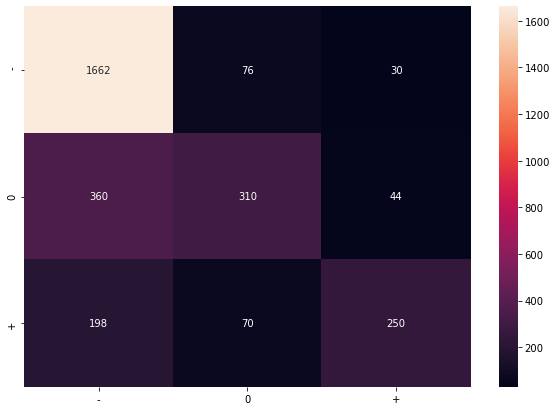

In [43]:
# Print and plot Confusion matrix to get an idea of how the distribution of the prediction is, among all the classes.
result =  clf.predict(X_test)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

print(metrics.f1_score(y_test, result,average='micro'))

# Presenting metrics on the airline review sentiments with a format of - for negative, 0 for neutral and + for positive
df_cm = pd.DataFrame(conf_mat, index = [i for i in "-0+"],
                  columns = [i for i in "-0+"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

## Conclusion
- The dataset evaluated contains reviews from an airline's twitter account. The purpose is to use Natural Language Processing with the predicted sentiments from the reviews and obtain good results.
- After removing the unnecessary columns from the dataset we are left with the two columns 'text' for the text description of the review and 'airline_sentiment' for the predicted sentiment (positive, neutral or negative) and 10000 rows to train, test and evaluate our models.
- To obtain better results while processing the data, we had to perform pre-processing steps, among those is removing HTML Tags, Tokenization, Remove the numbers, Removal of Special Characters and Punctuations, Removal of stopwords, Conversion to lowercase, Lemmatize and Join the words in the list to convert back to text string in the data frame.
- For removing HTML Tags we used Beautiful Soup with its built in html.parser for text cleaning.
- By replacing contractions the shortened versions of words are replaced by the full version of those words. This will be usefull later when we remove stop words.
- Numbers do not provide any meaningful information in regards to what we want to predict and understand, which is the sentiment of the reviewers towards the airline. Numbers were removed from our dataset.
- With tokenization we brake the set of text into individual tokens (words).
- By removing stop words we get rid of common words that carry less important meaning than key words for analyzing the data set.

- The airline sentiment data was converted from string to integer so that it can be processed for vectorization.
- Positive sentiments were represented with 1, neutral sentiments with 0, and negative sentiments were represented with -1.
- Used Random Forest to build model for the classification of reviews.
- The Count Vectorizer and the TF-IDF vectorizer obtained very similar scores. For this dataset it did not make much difference which Vectorizer is used.